## Installing Deep Graph Library (DGL)

In [18]:
import numpy as np
import dgl
import time

In [19]:
def build_karate_club_graph():
    src = np.array([1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 9, 10, 10,
        10, 11, 12, 12, 13, 13, 13, 13, 16, 16, 17, 17, 19, 19, 21, 21,
        25, 25, 27, 27, 27, 28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34,34,35,35,36,37,37,38,39,40,40,41,41,42,43,44,45,46,47,47,
        48,49,50,51,51,51,52,52,53,53,54,55,56,56,57,57,58,58,59,60,61,62,63,64,65,65,66,66,67,67,68,68,
        69,70,70,71,71,72,72,73,73,74,74,75,75,76,77,78,79,80,80,81,81,82,83,84,85,86,87,87,
        88,89,90,90,91,91,92,92,93,93,94,94,95,95,96,96,97,98,99,100,100])
    
    dst = np.array([0, 0, 1, 0, 1, 2, 0, 0, 0, 4, 5, 0, 1, 2, 3, 0, 2, 2, 0, 4,
        5, 0, 0, 3, 0, 1, 2, 3, 5, 6, 0, 1, 0, 1, 0, 1, 23, 24, 2, 23,
        24, 2, 23, 26, 1, 8, 0, 24, 25, 28, 2, 8, 14, 15, 18, 20, 22, 23,
        29, 30, 31, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30,
        31, 32, 33,35,37,39,40,41,56,29,30,65,60,63,79,99,99,92,55,59,10,1,67,100,74,76,34,36,90,
        91,94,77,66,64,90,69,69,93,83,85,88,82,71,72,78,54,100,97,52,80])
    
    u = np.concatenate([src,dst])
    v = np.concatenate([dst,src])
    
    return dgl.DGLGraph((u,v))

In [20]:
G = build_karate_club_graph()
print(G.number_of_nodes())
print(G.number_of_edges())

101
305


In [21]:
import networkx as nx

In [22]:
nx_G = G.to_networkx().to_undirected() #Converting G to networkx graph to visualise 

In [23]:
pos = nx.kamada_kawai_layout(nx_G)

In [24]:
pos #Positions of nodes -> Dictionary

{0: array([0.0573491 , 0.21453501]),
 1: array([0.11863082, 0.30385161]),
 2: array([-0.09753863,  0.08941887]),
 3: array([-0.08651069,  0.32999998]),
 4: array([0.37892571, 0.20146747]),
 5: array([0.47457714, 0.2082597 ]),
 6: array([0.62655036, 0.13477103]),
 7: array([-0.21168445,  0.49620135]),
 8: array([0.16031602, 0.04233897]),
 9: array([ 0.08144566, -0.36835981]),
 10: array([ 0.39797344, -0.10410532]),
 11: array([-0.30882423,  0.68947757]),
 12: array([-0.21910624,  0.65968927]),
 13: array([-0.21259594,  0.29678895]),
 14: array([ 0.18054308, -0.18336048]),
 15: array([ 0.50365332, -0.0641337 ]),
 16: array([ 0.94460456, -0.08249002]),
 17: array([0.37296573, 0.63695784]),
 18: array([ 0.32882274, -0.35095298]),
 19: array([ 0.29473488, -0.12809484]),
 20: array([-0.48673542, -0.00532707]),
 21: array([-0.01161258,  0.61919375]),
 22: array([-0.40831104,  0.18412533]),
 23: array([-0.15642391, -0.31242052]),
 24: array([-0.46554469, -0.5939057 ]),
 25: array([-0.2576653 ,

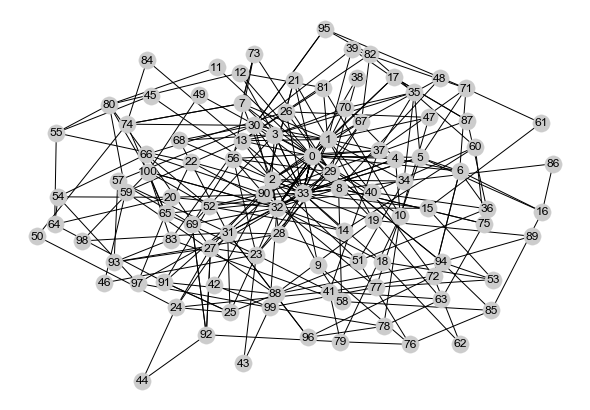

In [42]:
#Undirected graph using networkx
nx.draw(nx_G,pos,with_labels=True,node_color=[[0.8,0.8,0.8]])

## Assigning node features

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
embed = nn.Embedding(101,5)

In [28]:
G.ndata['feat'] = embed.weight

In [42]:
print(G.ndata['feat'][[2,7]])

tensor([[ 2.2724,  0.0334,  1.0389, -1.9647, -3.0180],
        [ 2.5947, -0.4099, -1.9408, -1.1268, -0.8362]],
       grad_fn=<IndexBackward>)


In [29]:
embed.weight

Parameter containing:
tensor([[ 5.7564e-01,  7.9261e-01, -4.2738e-01,  2.4839e-01, -5.0923e-01],
        [-1.2506e+00,  1.5412e-01, -2.1496e-01,  2.5851e+00, -5.7848e-01],
        [-2.6099e-01, -1.1374e+00, -1.1608e-01, -5.7669e-02,  1.0215e+00],
        [ 9.5885e-01,  1.7331e+00,  9.0374e-02, -2.5112e+00,  1.0654e+00],
        [-7.9876e-01,  2.4425e+00, -1.7485e+00,  1.6163e+00, -4.9967e-01],
        [-8.6936e-01,  9.2439e-01,  2.0494e+00, -8.3728e-01, -5.1441e-01],
        [-6.0288e-01, -8.9097e-01,  9.8155e-01, -1.5126e+00, -8.5228e-01],
        [ 2.2804e-01,  9.1324e-01,  9.9308e-01, -4.8053e-01, -8.0776e-01],
        [-6.5159e-01, -7.0831e-02,  1.0497e+00, -9.5100e-01, -8.3143e-01],
        [ 1.2776e-01, -2.1714e+00,  1.5900e+00,  7.4532e-01,  1.0945e+00],
        [-1.0312e+00, -6.0672e-01,  7.2692e-01, -3.9647e-01,  5.5973e-01],
        [-6.5938e-01, -5.4328e-02, -1.5790e+00,  1.0630e+00,  1.1522e+00],
        [-1.7499e+00,  9.5980e-01,  1.2766e+00, -4.1058e-01, -2.3096e-01],
   

## Define Graph Convolutional Network

In [30]:
from dgl.nn.pytorch import GraphConv

In [31]:
class GCN(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(GCN,self).__init__()
        self.conv1 = GraphConv(input_size,hidden_size)
        self.conv2 = GraphConv(hidden_size,num_classes)
    
    def forward(self,G,inputs):
        h = self.conv1(G,inputs)
        h = torch.relu(h)  #ReLU Activation
        h = self.conv2(G,h)
        return h

In [32]:
#2 output classes to represent cluster of instructor(node 0) and 
#club president(node 34) of Karate Club
net = GCN(5,4,2) 

In [33]:
inputs = embed.weight
labelled_nodes = torch.tensor([0,100])
labels = torch.tensor([0,1])

## Training

In [34]:
net

GCN(
  (conv1): GraphConv(in=5, out=4, normalization=both, activation=None)
  (conv2): GraphConv(in=4, out=2, normalization=both, activation=None)
)

In [35]:
net(G,inputs).detach()

tensor([[ 0.8663, -0.7155],
        [ 0.3258, -0.4676],
        [ 0.2673,  0.2862],
        [ 0.3200,  0.0141],
        [ 0.3531,  0.1203],
        [ 0.3708, -0.0302],
        [ 0.1049, -0.1779],
        [ 0.4659,  1.2350],
        [ 0.0847,  0.2236],
        [ 0.1773,  0.4872],
        [ 0.0302,  0.2565],
        [ 0.2782, -0.4267],
        [ 0.1959, -0.2997],
        [ 0.3789, -0.2615],
        [ 0.1232,  0.1394],
        [ 0.1232,  0.1394],
        [ 0.4590, -0.0354],
        [-0.0466,  0.1229],
        [ 0.1232,  0.1394],
        [ 0.3692, -0.5592],
        [ 0.1232,  0.1394],
        [ 0.1634,  0.7531],
        [ 0.1232,  0.1394],
        [ 0.2752,  0.1867],
        [ 0.2525,  0.1331],
        [-0.0117,  0.0309],
        [ 0.0733,  0.0589],
        [ 0.3569, -0.4972],
        [ 0.1334, -0.0248],
        [ 0.1627,  0.1938],
        [ 0.2582, -0.1572],
        [ 0.5819,  0.0986],
        [ 0.4516, -0.1677],
        [ 0.5399, -0.9842],
        [ 0.2616, -0.4164],
        [ 0.1856, -0

In [36]:
import itertools

optimizer = torch.optim.Adam(itertools.chain(net.parameters(), embed.parameters()), lr=0.01)
all_logits = []
start = time.time()
for epoch in range(50):
    logits = net(G, inputs)
    all_logits.append(logits.detach())
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[labelled_nodes], labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))
end = time.time()
print("Training time: {}".format(end-start))

Epoch 0 | Loss: 0.5887
Epoch 1 | Loss: 0.5499
Epoch 2 | Loss: 0.5138
Epoch 3 | Loss: 0.4799
Epoch 4 | Loss: 0.4478
Epoch 5 | Loss: 0.4173
Epoch 6 | Loss: 0.3886
Epoch 7 | Loss: 0.3651
Epoch 8 | Loss: 0.3424
Epoch 9 | Loss: 0.3205
Epoch 10 | Loss: 0.2992
Epoch 11 | Loss: 0.2786
Epoch 12 | Loss: 0.2596
Epoch 13 | Loss: 0.2414
Epoch 14 | Loss: 0.2239
Epoch 15 | Loss: 0.2070
Epoch 16 | Loss: 0.1908
Epoch 17 | Loss: 0.1753
Epoch 18 | Loss: 0.1605
Epoch 19 | Loss: 0.1465
Epoch 20 | Loss: 0.1334
Epoch 21 | Loss: 0.1212
Epoch 22 | Loss: 0.1100
Epoch 23 | Loss: 0.0996
Epoch 24 | Loss: 0.0900
Epoch 25 | Loss: 0.0811
Epoch 26 | Loss: 0.0729
Epoch 27 | Loss: 0.0655
Epoch 28 | Loss: 0.0588
Epoch 29 | Loss: 0.0528
Epoch 30 | Loss: 0.0473
Epoch 31 | Loss: 0.0424
Epoch 32 | Loss: 0.0380
Epoch 33 | Loss: 0.0340
Epoch 34 | Loss: 0.0305
Epoch 35 | Loss: 0.0274
Epoch 36 | Loss: 0.0246
Epoch 37 | Loss: 0.0222
Epoch 38 | Loss: 0.0200
Epoch 39 | Loss: 0.0181
Epoch 40 | Loss: 0.0165
Epoch 41 | Loss: 0.0150
Ep

In [37]:
logp[labelled_nodes]

tensor([[-5.2238e-03, -5.2571e+00],
        [-4.5747e+00, -1.0363e-02]], grad_fn=<IndexBackward>)

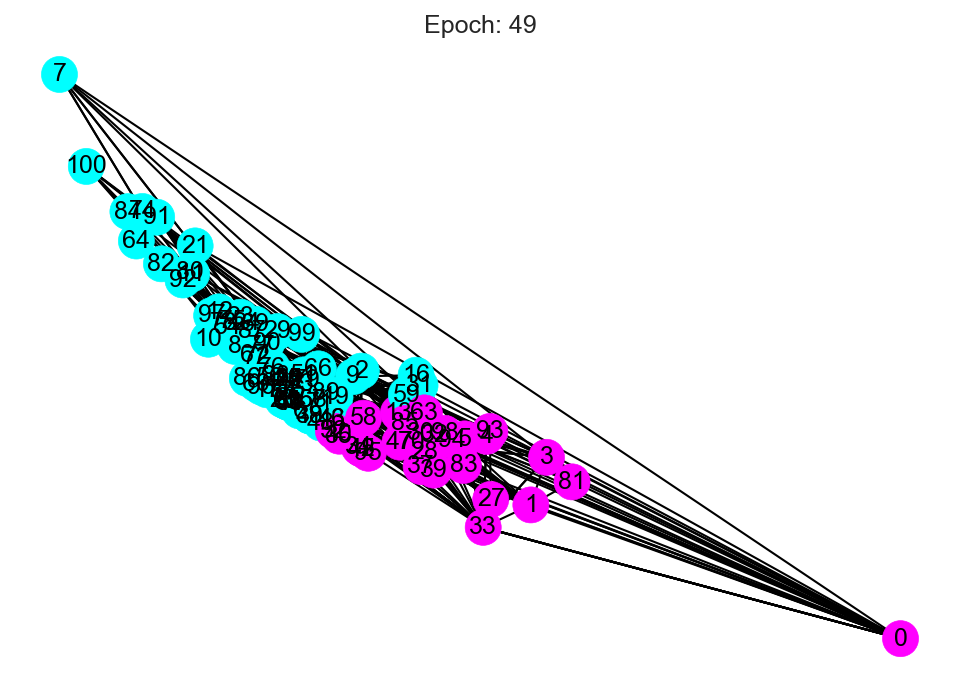

In [41]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def draw(i):
    cls1color = '#00FFFF'
    cls2color = '#FF00FF'
    pos = {}
    colors = []
    for v in range(101):
        pos[v] = all_logits[i][v].numpy()  # i = no. of epoch, v = no. of node
        cls = pos[v].argmax()
        colors.append(cls1color if cls else cls2color)
    ax.cla()
    ax.axis('off')
    ax.set_title('Epoch: %d' % i)
    nx.draw_networkx(nx_G, pos, node_color=colors,with_labels=True, node_size=300, ax=ax)

fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(49)

## Creating Graph by progressively adding more nodes and edges

In [39]:
G = dgl.DGLGraph()
G.add_nodes(10)

#Adding edges using for loop
for i in range(1,4):
    G.add_edge(i,0)

#Adding edges using python list
src = list(range(4,8))
dst = [0]*4
G.add_edges(src,dst)

#Adding edges using PyTorch tensors
src = torch.tensor([8,9])
dst = torch.tensor([0,0])
G.add_edges(src,dst)

C:\Users\Varun Sirpal\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Varun Sirpal\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


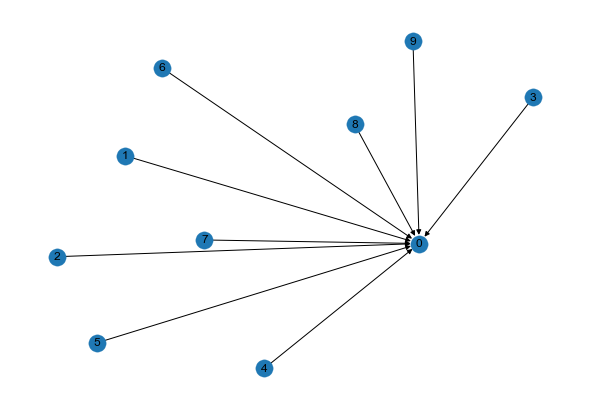

In [40]:
plt.style.use("seaborn")
nx.draw(G.to_networkx(), with_labels=True)
plt.show()